<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Tensorflow-2-and-Keras-Deep-Learning/blob/main/04_Keras_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train=X_train/255
X_test=X_test/255

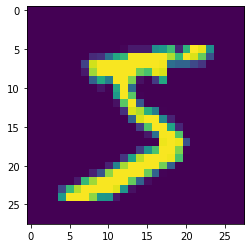

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add((Dense(10,activation='softmax')))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping= EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1249 - accuracy: 0.9621 - val_loss: 0.0587 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.0530 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0414 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0373 - val_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 0.0448 - val_accuracy: 0.9861


In [16]:
metrics=pd.DataFrame(model.history.history)

In [17]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.125374,0.961267,0.052514,0.9832
1,0.042211,0.987017,0.050084,0.9833
2,0.025053,0.992417,0.045209,0.9860
3,0.017983,0.994133,0.047198,0.9855


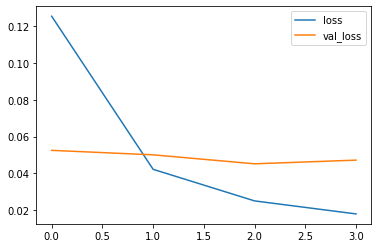

In [19]:
metrics[['loss','val_loss']].plot()

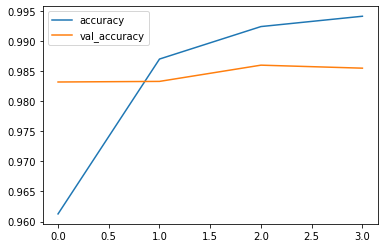

In [21]:
metrics[['accuracy','val_accuracy']].plot()

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
y_pred=(model.predict(X_test)>0.5)*1

In [30]:
y_pred.shape

(10000, 10)

In [49]:
y_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       1.00      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.97      1009

   micro avg       0.99      0.98      0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.98      0.99     10000
 samples avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

array([[ 966,    1,    1,    1,    0,    2,    7,    0,    1,    1],
       [   3, 1126,    0,    2,    0,    1,    2,    1,    0,    0],
       [   2,    0, 1011,   13,    0,    0,    0,    4,    1,    1],
       [   0,    0,    0, 1005,    0,    4,    0,    0,    1,    0],
       [   4,    0,    0,    0,  954,    0,    6,    0,    0,   18],
       [   0,    0,    0,    5,    0,  886,    1,    0,    0,    0],
       [   2,    1,    0,    1,    1,    4,  947,    0,    2,    0],
       [   0,    0,    5,    1,    0,    0,    0, 1016,    1,    5],
       [   3,    0,    1,    3,    0,    4,    2,    2,  951,    8],
       [   6,    0,    0,    3,    1,    8,    0,    3,    0,  988]])

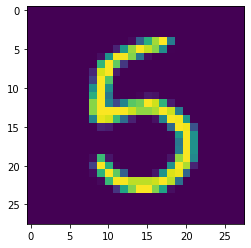

In [57]:
x=np.random.randint(0,10000)
image=X_test[x]
plt.imshow(image.reshape(28,28))

In [61]:
(model.predict(image.reshape(1,28,28,1))>0.5).argmax()

5